# STAT207 Final Project - Can You Predict a Stroke?

Michelle Jun

## 1. Introduction

**Motivation**: The dataset I have chosen from this project report is the stroke prediction dataset. When reading the context for the dataset, I learned that according to the World Health Organization, stroke is the second leading cause of death. This information along with my interest in healthcare technology is why I chose this dataset because I thought it would be interesting to discover what factors could lead to a stroke.

**Research Questions:**
1. What is the relationship between gender, age, hypertension, and bmi in this dataset? Furthermore, how does the relationship between gender, hypertension, age, and bmi change for the different values for stroke? </br>
*Since gender is a categorical variable, I will be using box plots to show the data. For hpypertension, age, and bmi, I will be representing the relationship with a scatter plot because they are both numerical variables.*</br></br>
2. For the people living across the world who have had a stroke, is there an association between having a stroke and living in a rural area versus an urban area? </br>
*To show the relationship between people living in rural or urban areas that have had a stroke, we will be performing a difference in proportion means hypothesis test. This will allow us to test if there is a difference in the proportion of people who have had a stroke that are living in rural areas versus the proportion of people who have had a stroke that are living in urban areas.*</br></br>
3. Is there a linear relationship between age and hypertension, heart disease, average glucose level, and bmi in the sample? </br>
*For the representation of this linear relationship, I will be calculating a linear regression. This will show us the estimates on how hypertension, heart disease, average glucose level, and bmi variables change as the age changes.*</br></br>
4. Is there a linear relationship between the log-odds of someone having a stroke and if they smoked, age, history of heart disease, average glucose level, and bmi? </br>
*A logistic regression will be used to show this linear relationship because it will allow us to describe and explain the relationship between if someone had a stroke and the independent variables: smoked, age, heart disease, average glucose levels, and bmi.*


In [73]:
#Imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile as zp
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import norm
from scipy.stats import f
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [75]:
df.shape

(5110, 12)

In [76]:
missing_values = ['NaN']
df = pd.read_csv('healthcare-dataset-stroke-data.csv', na_values=missing_values)
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


The original dataset has 5100 rows and 12 columns. After removing the rows with missing values, the dataset has 4909 rows and 12 columns.

## 2. Descriptive Analytics

What is the relationship between gender, age, hypertension, and bmi in this dataset? Furthermore, how does the relationship between gender, hypertension, age, and bmi change for the different values for stroke?

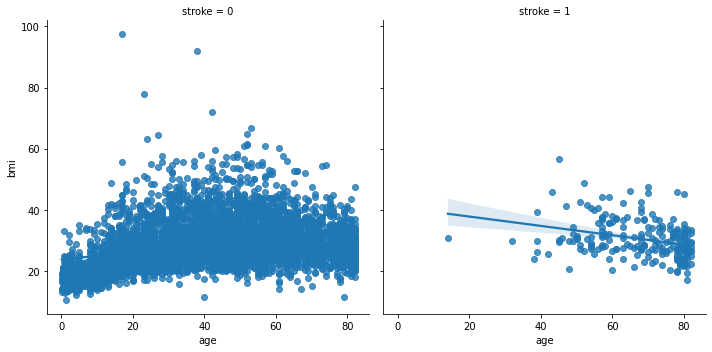

In [137]:
sns.lmplot(
    data=df,
    x="age", y="bmi", col="stroke"
)

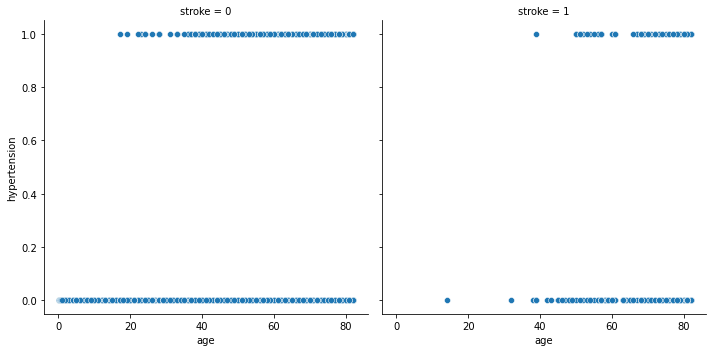

In [78]:
sns.relplot(
    data=df,
    x="age", y="hypertension", col="stroke"
)

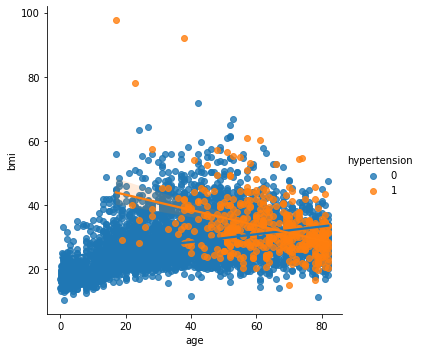

In [138]:
sns.lmplot(
    data=df,
    x="age", y="bmi", hue="hypertension"
)

<AxesSubplot:xlabel='gender', ylabel='bmi'>

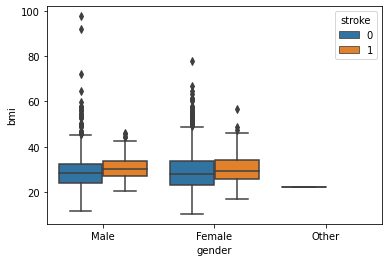

In [80]:
sns.boxplot(x="gender", y="bmi", hue="stroke",
                 data=df)

*In the above graph, we can see one data point for 'gender' that is labeled as 'other'. I am removing this for the majority of the graphs because it doesn't tell us any significant information and I am not sure what 'other' gender means.*

Text(0.5, 1.0, 'Relationship between Gender, BMI, and Stroke')

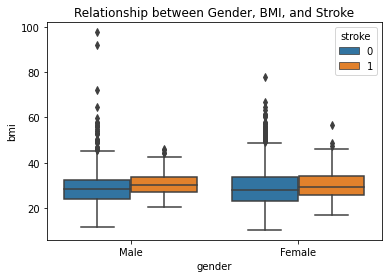

In [81]:
sns.boxplot(x="gender", y="bmi", hue="stroke",
                 data=df, order = ['Male', 'Female']).set_title("Relationship between Gender, BMI, and Stroke")

Text(0.5, 1.0, 'Relationship between Gender, Age, and Stroke')

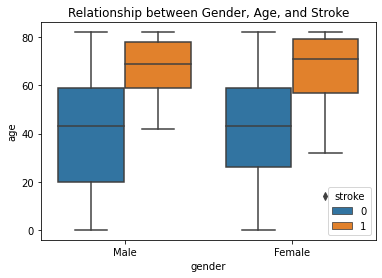

In [82]:
sns.boxplot(x="gender", y="age", hue="stroke",
                 data=df, order = ['Male', 'Female']).set_title("Relationship between Gender, Age, and Stroke")

In [83]:
df[["age", "bmi", "gender", "stroke"]].groupby(["gender","stroke"]).mean()

age        bmi
gender stroke                      
Female 0       42.409190  29.015952
       1       67.241667  30.218333
Male   0       40.831322  28.547711
       1       68.348315  30.812360
Other  0       26.000000  22.400000

There was not a strong relationship between age and bmi for people that haven't had a stroke, gender and age, hypertension and bmi, and gender and bmi. There is a weak, negative correlation between age and bmi for people who have had a stroke. We see that people who are older in age tend to have a lower BMI. Also, we see a weak, negative correlation between age, bmi, and hypertension. Generally, people older in age are more likely to have hypertension, which makes sense because we commonly hear older ages having high blood pressure compared to younger people. This might be the reasoning for the weak, positive correlation between age, bmi, and no hypertention. For both males and females, the mean age for those who have not had a stroke is lower than for those who have had a stroke but seem to be similar. BMI doesn't really seem to determine whether or not someone has a stroke for both males and females. People who have not had a stroke had a wider range of BMI's which might show that people who have a had a stroke are a bit more concious about there health and tend to have a lower BMI, but that can't be certain looking at these graphs. However, age did have a relationship with stroke. People older in age are more likely to have a stroke. This was also shown in the table for the mean of age and bmi. We can see that for both females and males, the mean age for a stroke is about 25 years more than the mean age for not having had a stroke.

## 3. Inference

For the people living across the world who have had a stroke, is there an association between living in a rural area or an urban area?

Hypothesis for this test: </br></br>
$H_{0}: p_{rural} - p_{urban}$ = 0 </br>
$H_{A}: p_{rural} - p_{urban} \neq$ 0

In [84]:
stroke = df[df['stroke'] == 1]
stroke_num = stroke.shape[0]

In [85]:
rural_stroke = stroke[stroke['Residence_type'] == 'Rural']
rural_stroke.shape[0]

100

In [86]:
urban_stroke = stroke[stroke['Residence_type'] == 'Urban']
urban_stroke.shape[0]

109

In [87]:
#population proportions
prop_rural = rural_stroke.shape[0] / stroke_num
prop_urban = urban_stroke.shape[0] / stroke_num
prop_urban

0.5215311004784688

In [88]:
#population difference
dist_mean = prop_rural - prop_urban
dist_mean

-0.043062200956937746

In [89]:
dist_std = np.sqrt(((prop_rural*(1 - prop_rural))/rural_stroke.shape[0]) + (prop_urban*(1-prop_urban)/urban_stroke.shape[0]))
dist_std

0.06917144638660745

This sampling distribution of sample proportion differences is approzimately normal because the Central Limit Theorem conditions for sample proportion differences hold.
1. The sample of strokes in rural areas around the world is randomly selected from the world population.
2. The sample of strokes in urban areas around the world is randomly selected from the world population.
3. $n_{rural}$ = 100 < 10% of the population of rural areas.
4. $n_{urban}$ = 109 < 10% of the population of urban areas.
5. $n_{rural}p_{rural}$ = 100(0.4578) >= 10 and 100(1 - 0.4578) >= 10.
6. $n_{urban}p_{urban}$ = 109(0.5422) >= 10 and 109(1 - 0.5422) >= 10.
7. The two samples are independent from each other. We know this because there is not a pairwise relationship in the way in which the two samples were not selected.

In [90]:
test_stat = (dist_mean - 0) / dist_std
test_stat

-0.6225430174794665

In [91]:
p_value = 2 * (1 - norm.cdf(np.abs(test_stat)))
p_value

0.5335848667781611

**Conclusion with p-value** </br>
Because *p-value* = 0.534 >= $\alpha$ = 0.05, we fail to reject the null hypothesis. Thus, there is not sufficient evidence to suggest that the difference between the proportion of all people who have had a stroke and live in a rural area and the proportion of all people who have had a stroke and live in an urban area is non-zero.

## 4. Linear Regression

Is there a linear relationship between age and hypertension, heart disease, average glucose level, and bmi  in the sample?

In [136]:
mod = smf.ols('age ~ hypertension + heart_disease + avg_glucose_level + bmi', data = df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     351.7
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.38e-266
Time:                        18:07:25   Log-Likelihood:                -21642.
No. Observations:                4909   AIC:                         4.329e+04
Df Residuals:                    4904   BIC:                         4.333e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.2865      1.203      9.380      0.000       8.928      13.646
hypertension         14.2551      1.013     14.067      0.000      12.268      16.242
heart_disease        21.3793      1.330     16.072      0.000      18.772      23.987
avg_glucose_level     0.0626      0.007      9.435      0.000       0.050       0.076
bmi                   0.7829      0.037     21.110      0.000       0.710       0.856
==============================================================================
Omnibus:                      236.836   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.400
Skew:                           0.225   Prob(JB):                     3.57e-28
Kurtosis:                       2.356   Cond. No.                         554.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{age} = 11.2865 + 14.2551hypertension + 21.3793heartdisease + 0.0626avgglucoselevel + 0.7829bmi$

***Checking Linear Regression Conditions***

**1. Linearity Condition** </br>
In the fitted values vs. residual plot below, we see that there are parts of the plot that have more points above the line than below the line. Thus, this condition is not quite met.

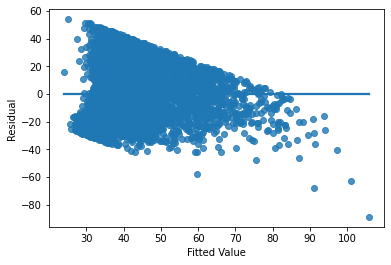

In [94]:
sns.regplot(x = mod.fittedvalues, y = mod.resid, ci = None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**2. Constant Variance of Residuals Condition** </br>
In the fitted values vs. residuals plot above, we see that the y-axis spread changes as we move from left to right. Thus, this condition is not quite met either.

**3. Residuals are Normally Distributed** </br>
Looking at a histogram of the residuals for this model (below), the distribution of residuals is right skewed. Thus, this distribution cannot be normal and this condition is not met.

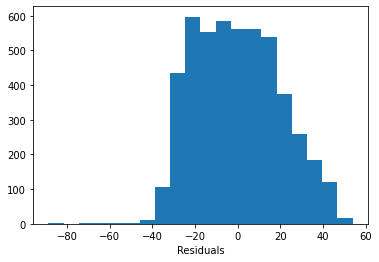

In [95]:
plt.hist(mod.resid, bins = 20)
plt.xlabel('Residuals')
plt.show()

**4. Independence of Residuals** </br>
We verify that the data is randomly sampled and the sample size n = 4909 < 10% of the world population. </br>
Thus the condition for independence of residuals may not be violated in this paritcular way.

In [96]:
df.shape[0]

4909

**5. No-Multicollinearity Condition** </br>
It looks like average glucose level and bmi explanatory variables have a strong linear relationship with each other so this condition is not met either.

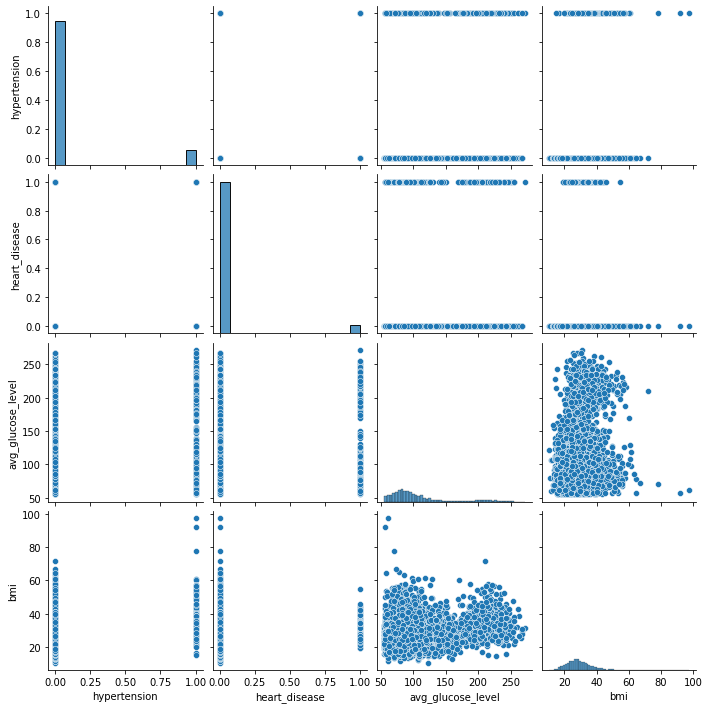

In [97]:
sns.pairplot(df[['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']])
plt.show()

In [98]:
df[['hypertension', 'heart_disease', 'avg_glucose_level', 'age']].corr()

,hypertension,heart_disease,avg_glucose_level,age
hypertension,1.000000,0.115991,0.180543,0.274425
heart_disease,0.115991,1.000000,0.154525,0.257123
avg_glucose_level,0.180543,0.154525,1.000000,0.235838
age,0.274425,0.257123,0.235838,1.000000


In [99]:
mod.rsquared

0.2229340731141768

In [100]:
mod2 = smf.ols('age ~ heart_disease + avg_glucose_level + bmi', data = df).fit()
mod2.rsquared

0.19157846906610887

In [101]:
mod3 = smf.ols('age ~ hypertension + avg_glucose_level + bmi', data = df).fit()
mod3.rsquared

0.18200139515681346

In [102]:
mod4 = smf.ols('age ~ hypertension + heart_disease + bmi', data = df).fit()
mod4.rsquared

0.2088285328927747

In [103]:
mod5 = smf.ols('age ~ hypertension + heart_disease + avg_glucose_level', data = df).fit()
mod5.rsquared

0.15232298950747258

If we had to delete an explantory variable from the model, we would delete the average glucose level variable because that leaves us with the highest R-squared value.

The percent variability of my response variable explained by the model is 22.3%, which is low.

In [104]:
# Prediction of age for someone who has no history of hypertension, does have history of heart disease, an avgerage glucose level of 170, and a bmi of 32.
stroke_predict = 11.2865 + 14.2551*0 + 21.3793*1 + 0.0626*170 + 0.7829*32
stroke_predict

68.3606

We would expect that a person that has no history of hypertension, does have a history of heart disease, an average glucose level of 170, and a bmi of 32 to be 69 years old (since age is measured in decimals, I am rounding up to the nearest whole number).

We would like to determine if we have sufficient evidence to suggest that at least one of the slopes in our corresponding population model is non-zero.</br>
</br>
$H_0 : \beta_{hypertension} = \beta_{heartdisease} = \beta_{avgglucoselevel} = \beta_{bmi} = 0$ </br>
$H_A$ : at least one $\beta_{i} \neq 0$ for $i$ = hypertension, heart disease, avg glucose level, bmi

In [105]:
t_stat = 351.7
p_val = 1.38e-266

p = 4
n = df.shape[0]
pval = 1 - f.cdf(t_stat, dfn = p, dfd = n - p - 1)
pval

1.1102230246251565e-16

Using a significance level of $\alpha$ = 0.05, since the p-value = 1.11e-16 < 0.05, we reject the null hypothesis. Thus there is sufficient evidence to suggest that at least one of the slopes in the corresponding population model is non-zero.

*Quick Note: this test is a bit vague because we are not able to see which slope is non-zero. However, if we were to perform a hypothesis test for each individual slope, we will have a 81.5% chance of making a type I error (0.95**2), which is why I did not perform that test*

A linear regression model allows us to estimate how a dependent variable changes as the independent variable changes. In our case, this linear regression analysis showed us how the likeliness of someone having a stroke is based off the 4 explanatory variables: age, hypertension, heart disease, and average glucose level. We found the following linear regression equation:
$\hat{age} = 11.2865 + 14.2551hypertension + 21.3793heartdisease + 0.0626avgglucoselevel + 0.7829bmi$ and discovered that this model has a 22.3% variability of the response variable that is explained by the model, which is very low. Finally, we see that at least one of the slopes in the corresponding population model is non-zero so there is a linear relationship between age and hypertension, heart disease, average glucose level, and bmi, but not a strong relationship.

## 5. Logistic Regression

Is there a linear relationship between the log-odds of someone having a stroke and if they smoked, age, history of heart disease, average glucose level, and bmi?

In [106]:
df['smoker'] = df['smoking_status'].map({'formerly smoked':1, 'smokes':1, 'never smoked': 0, 'Unknown': 0})
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_map,smoker
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,1.0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1.0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1.0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0.0,1
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0,1.0,0


In [107]:
df[['age', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'smoker', 'stroke']]

,age,heart_disease,avg_glucose_level,bmi,smoking_status,smoker,stroke
0,67.0,1,228.69,36.6,formerly smoked,1,1
2,80.0,1,105.92,32.5,never smoked,0,1
3,49.0,0,171.23,34.4,smokes,1,1
4,79.0,0,174.12,24.0,never smoked,0,1
5,81.0,0,186.21,29.0,formerly smoked,1,1
...,...,...,...,...,...,...,...
5104,13.0,0,103.08,18.6,Unknown,0,0
5106,81.0,0,125.20,40.0,never smoked,0,0
5107,35.0,0,82.99,30.6,never smoked,0,0
5108,51.0,0,166.29,25.6,formerly smoked,1,0


In [108]:
mod = smf.logit('stroke ~ smoker + age + heart_disease + avg_glucose_level + bmi', data = df).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.140672
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4909
Model:                          Logit   Df Residuals:                     4903
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.2009
Time:                        18:05:57   Log-Likelihood:                -690.56
converged:                       True   LL-Null:                       -864.19
Covariance Type:            nonrobust   LLR p-value:                 6.776e-73
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -8.0537      0.549    -14.664      0.000      -9.130      -6.977
smoker                0.2333      0.150      1.559      0.119      -0.060       0.527
age                   0.0703      0.006     12.413      0.000       0.059       0.081
heart_disease         0.3993      0.203      1.964      0.049       0.001       0.798
avg_glucose_level     0.0051      0.001      4.006      0.000       0.003       0.008
bmi                   0.0063      0.012      0.544      0.586      -0.017       0.029
=====================================================================================
"""

In [109]:
df_train, df_test = train_test_split(df, test_size = 0.20, random_state = 207)

In [110]:
df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_map,smoker
460,2893,Female,7.0,0,0,No,children,Rural,72.35,17.0,Unknown,0,1.0,0
581,44315,Male,18.0,0,0,No,Self-employed,Rural,182.86,21.0,Unknown,0,0.0,0
1732,24272,Male,63.0,0,0,Yes,Govt_job,Rural,217.66,28.7,formerly smoked,0,0.0,1
3601,54962,Female,27.0,0,0,No,Private,Urban,82.05,21.0,Unknown,0,1.0,0
3963,49400,Male,75.0,0,0,Yes,Private,Rural,97.22,28.4,never smoked,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,35222,Female,75.0,0,0,Yes,Private,Urban,86.40,42.6,never smoked,0,1.0,0
4357,38980,Male,61.0,0,0,Yes,Govt_job,Urban,107.33,26.4,formerly smoked,0,0.0,1
2589,31402,Female,62.0,0,0,Yes,Self-employed,Rural,102.21,36.3,never smoked,0,1.0,0
2079,55522,Female,4.0,0,0,No,children,Rural,206.25,17.0,Unknown,0,1.0,0


In [111]:
df_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_map,smoker
786,24665,Female,64.0,1,0,Yes,Private,Rural,93.99,37.8,formerly smoked,0,1.0,1
3264,24836,Female,61.0,0,0,Yes,Private,Rural,72.01,26.0,formerly smoked,0,1.0,1
30,43717,Male,57.0,1,0,Yes,Private,Urban,212.08,44.2,smokes,1,0.0,1
846,12270,Male,71.0,0,0,Yes,Govt_job,Rural,186.45,26.7,never smoked,0,0.0,0
3396,19828,Female,56.0,1,0,Yes,Private,Rural,97.37,34.1,smokes,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,24218,Female,78.0,0,0,No,Private,Rural,87.70,29.6,never smoked,0,1.0,0
2119,25930,Male,42.0,0,0,Yes,Private,Urban,68.24,33.1,formerly smoked,0,0.0,1
4045,56195,Male,37.0,0,0,Yes,Govt_job,Urban,156.69,35.2,never smoked,0,0.0,0
1510,29327,Female,30.0,0,0,No,Self-employed,Urban,65.84,24.8,smokes,0,1.0,1


In [112]:
current_mod = smf.logit('stroke ~ smoker + age + heart_disease + avg_glucose_level + bmi', data = df_train).fit()
print('Iteration 1: BIC of the Current Model', current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.142830
         Iterations 9
Iteration 1: BIC of the Current Model 1171.4371966638466


In [113]:
test_mod = smf.logit('stroke ~  age + heart_disease + avg_glucose_level + bmi', data = df_train).fit()
print('BIC of Test Model that Deletes smoker from Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.143006
         Iterations 9
BIC of Test Model that Deletes smoker from Current Model 1164.551150266945


Because there was at least one "test model" that has a BIC score(1171) that is lower than the BIC score of the current model(1164), we will continue with this test model as our current model in the algorithm.

In [114]:
current_mod = smf.logit('stroke ~ age + heart_disease + avg_glucose_level + bmi', data = df_train).fit()
print('Iteration 2: BIC of Current Model', current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.143006
         Iterations 9
Iteration 2: BIC of Current Model 1164.551150266945


In [115]:
test_mod = smf.logit('stroke ~ heart_disease + avg_glucose_level + bmi', data = df_train).fit()
print('BIC of Test Model that Deletes age from Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.167261
         Iterations 7
BIC of Test Model that Deletes age from Current Model 1346.7685376009151


In [116]:
test_mod = smf.logit('stroke ~ age + avg_glucose_level + bmi', data = df_train).fit()
print('BIC of Test Model that Deletes heart_disease from Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.143178
         Iterations 9
BIC of Test Model that Deletes heart_disease from Current Model 1157.624132429558


Because there was at least one "test model" that has a BIC score(1157) that is lower than the BIC score of the current model(1164), we will continue with this test model as our current model in the algorithm.

In [117]:
current_mod = smf.logit('stroke ~ age + avg_glucose_level + bmi', data = df_train).fit()
print('Iteration 3: BIC of Current Model', current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.143178
         Iterations 9
Iteration 3: BIC of Current Model 1157.624132429558


In [118]:
test_mod = smf.logit('stroke ~ avg_glucose_level + bmi', data = df_train).fit()
print('BIC of Test Model that deletes age from Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.170027
         Iterations 7
BIC of Test Model that deletes age from Current Model 1360.2194425928608


In [119]:
test_mod = smf.logit('stroke ~ age + bmi', data = df_train).fit()
print('BIC of Test Model that deletes avg_glucose_level from Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.144970
         Iterations 9
BIC of Test Model that deletes avg_glucose_level from Current Model 1163.42352183903


In [120]:
test_mod = smf.logit('stroke ~ age + avg_glucose_level', data = df_train).fit()
print('BIC of Test Model that deletes bmi from Current Model', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.143182
         Iterations 9
BIC of Test Model that deletes bmi from Current Model 1149.3816827302471


Because there was at least one "test model" that has a BIC score(1149) that is lower than the BIC score of the current model(1157), we will continue with this test model as our current model in the algorithm.

In [121]:
current_mod = smf.logit('stroke ~ age + avg_glucose_level', data = df_train).fit()
print('Iteration 4: BIC of Current Model', current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.143182
         Iterations 9
Iteration 4: BIC of Current Model 1149.3816827302471


In [122]:
test_mod = smf.logit('stroke ~ age', data = df_train).fit()
print('BIC of Test Model without age', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.145094
         Iterations 9
BIC of Test Model without age 1156.1209088181377


In [123]:
test_mod = smf.logit('stroke ~ avg_glucose_level', data = df_train).fit()
print('BIC of Test Model without avg_glucose_level', test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.170095
         Iterations 7
BIC of Test Model without avg_glucose_level 1352.479126175727


In [124]:
final_mod = smf.logit('stroke ~ age + avg_glucose_level', data = df_train).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.143182
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3927
Model:                          Logit   Df Residuals:                     3924
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.1932
Time:                        18:05:58   Log-Likelihood:                -562.28
converged:                       True   LL-Null:                       -696.94
Covariance Type:            nonrobust   LLR p-value:                 3.290e-59
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.7580      0.421    -18.448      0.000      -8.582      -6.934
age                   0.0707      0.006     11.842      0.000       0.059       0.082
avg_glucose_level     0.0055      0.001      3.968      0.000       0.003       0.008
=====================================================================================
"""

$\hat{stroke} = -7.7580 + 0.0707age + 0.0055avgglucoselevel$

We would like to determine if we have sufficient evidence to suggest that at least one of the slopes in our corresponding population model is non-zero.</br>
</br>
$H_0 : \beta_{age} = 0$ </br>
$H_A : \beta_{age}$ $\neq$ 0 </br> </br>
$H_0 : \beta_{avgglucoselevel} = 0$ </br>
$H_A : \beta_{avgglucoselevel}$ $\neq$ 0 </br> </br>

*Checking the conditions for conducting inference on a population slope*
1. Independence of Observations Condition is met:
    a. Sample is random
    b. n < 10% of the population size.
2. Linearity Condition is met
3. No Multicollinearity Condition is met

In [125]:
point_est_age = 0.0707
point_est_agl = 0.0055

se_age = 0.006
se_agl = 0.001

null_value = 0

test_stat_age = (point_est_age - null_value) / se_age
test_stat_agl = (point_est_agl - null_value) / se_agl

In [126]:
pval_age = 2 * (1 - norm.cdf(np.abs(test_stat_age)))
pval_agl = 2 * (1 - norm.cdf(np.abs(test_stat_agl)))
print('p-value for age:', pval_age, '\np-value for average glucose level:', pval_agl)

p-value for age: 0.0 
p-value for average glucose level: 3.797912495606681e-08


Using a significance level of $\alpha$ = 0.05 we can say that because the p-value for age is 0.0 < 0.05 and the p value for average glucose level is 3.80e-08 < 0.05, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the slope for age and average glucose level is non-zero in the population logistic regression.

In [127]:
test_mod = smf.logit('stroke ~ smoker + age + heart_disease + avg_glucose_level + bmi', data = df_train).fit()
test_mod.summary()

Optimization terminated successfully.
         Current function value: 0.142830
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3927
Model:                          Logit   Df Residuals:                     3921
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.1952
Time:                        18:05:58   Log-Likelihood:                -560.89
converged:                       True   LL-Null:                       -696.94
Covariance Type:            nonrobust   LLR p-value:                 9.934e-57
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.8504      0.602    -13.049      0.000      -9.030      -6.671
smoker                0.1964      0.166      1.183      0.237      -0.129       0.522
age                   0.0696      0.006     11.226      0.000       0.057       0.082
heart_disease         0.2622      0.234      1.122      0.262      -0.196       0.720
avg_glucose_level     0.0052      0.001      3.640      0.000       0.002       0.008
bmi                   0.0026      0.013      0.202      0.840      -0.023       0.028
=====================================================================================
"""

In [128]:
phat_test = test_mod.predict(exog=df_test)
df_test['phat_test'] = phat_test

In [129]:
fpr_test, tpr_test, score_test = roc_curve(y_true=df_test['smoker'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['smoker'], y_score=df_test['phat_test'])
print(auc)

0.691049863654071


In [130]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

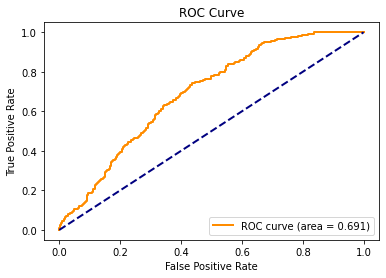

In [131]:
plot_roc(fpr_test, tpr_test, auc)

FPR = 0.5, TPR = 0.8 </br>
At a FPR of 0.5, the TPR starts to level off in the ROC curve above. By increasing the FPR any more past 0.5, we do not gain much more in the way of a better TPR. So we could choose the predictive probability threshold that gives us this combination.

In [132]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

tpr_fpr_thresh(df_test['smoker'], df_test['phat_test'], 0.01)

,threshold,tpr,fpr
0,0.01,0.778146,0.5


In [133]:
pd.options.mode.chained_assignment = None

for p in np.arange(0,1.01,0.01):
    df_test['yhat'] = 1 * (df_test['phat_test'] > p)
    tn, fp, fn, tp = confusion_matrix(y_true=df_test['smoker'], y_pred=df_test['yhat']).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    print('Threshold:', p, 'FPR:', fpr, 'TPR:', tpr)

Threshold: 0.0 FPR: 1.0 TPR: 1.0
Threshold: 0.01 FPR: 0.5 TPR: 0.7781456953642384
Threshold: 0.02 FPR: 0.37941176470588234 TPR: 0.6556291390728477
Threshold: 0.03 FPR: 0.3014705882352941 TPR: 0.5463576158940397
Threshold: 0.04 FPR: 0.2426470588235294 TPR: 0.4602649006622517
Threshold: 0.05 FPR: 0.20588235294117646 TPR: 0.40728476821192056
Threshold: 0.06 FPR: 0.175 TPR: 0.3509933774834437
Threshold: 0.07 FPR: 0.15735294117647058 TPR: 0.30132450331125826
Threshold: 0.08 FPR: 0.1411764705882353 TPR: 0.2582781456953642
Threshold: 0.09 FPR: 0.12794117647058822 TPR: 0.23841059602649006
Threshold: 0.1 FPR: 0.11764705882352941 TPR: 0.2251655629139073
Threshold: 0.11 FPR: 0.10882352941176471 TPR: 0.19205298013245034
Threshold: 0.12 FPR: 0.09117647058823529 TPR: 0.17549668874172186
Threshold: 0.13 FPR: 0.08676470588235294 TPR: 0.1390728476821192
Threshold: 0.14 FPR: 0.06911764705882353 TPR: 0.12251655629139073
Threshold: 0.15 FPR: 0.058823529411764705 TPR: 0.10596026490066225
Threshold: 0.16 FP

A predictive probability threshold of $p_0$ = 0.01 will give us a tpr = 0.77 and fpr = 0.5. This gives us the "best" combination for values that are close to a false positive rate of 0 and a true positive rate of 1.

The ROC curve area is 0.691 which means this model does not have a predictive probability threshold that will get us closer to ideal (fpr, tpr) = (0, 1). So this is an indication that this classifer in general will not yield a very accurate classifications of the sample data.

With this probability threshold, we can say that the true positive rate (predicting and actually having a stroke) is 0.77 and the false positive rate (not predicting a stroke but having a stroke) is 0.5.

For the logistic regression test, we conclude that there is a strong linear relationship between someone having a stroke and their bmi and average glucose levels using the backwards elimination algorithm. After fitting this model, we were able to conclude with the hypothesis test that there is evidence that the slopes for both variables are non-zero. Unfortunately, with ROC curve and AUC score, we were able to discover that the model is not very accurate at predicting a stroke. 

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes in their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

Text(0.5, 1.0, 'Does Work Type and Age Affect Stroke')

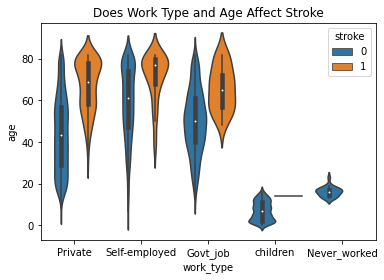

In [134]:
sns.violinplot(x="work_type", y="age", hue="stroke", data=df).set_title("Does Work Type and Age Affect Stroke")

Text(0.5, 1.0, 'Does Being Married and Age Affect Stroke')

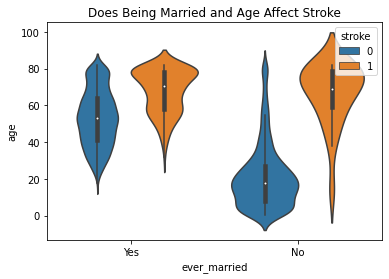

In [135]:
sns.violinplot(x="ever_married", y="age", hue="stroke", data=df).set_title("Does Being Married and Age Affect Stroke")

Based off these graphs, it doesn't seem like being married or work affects if someone has a stroke or not.

## 6. Conclusion

After performing analysis and multiple tests on the stroke dataset, we conclude that the biggest factors in predicting a stroke are hypertension, bmi, average glucose levels, and history of heart disease. With the hypothesis test of population proportions, we see that living in a rural or urban area does not determine whether or not someone will have a stroke. There is a linear relationship between age and hypertension, heart disease, average glucose level, and bmi in this sample. There is also a linear relationship between the log-odds of someone having a stroke and if they smoked, age, history of heart disease, average glucose level, and bmi. Unfortunately, the relationship wasn't very strong and there is a lot of inaccuracy in the models. I believe that this is due to the fact that the majority of the data are people in the world that were younger in age, but as we can see from some of the tests, older people tend to have a higher chance of stroke than younger people. Additionally, it only mentioned if people had hypertension or not instead of their blood pressure levels, which could have improved stroke predictability. Same with smoking. Smoking is a factor for if someone has a stroke, but in this dataset, it only mentioned if they had smoked or not instead of how frequently or how long someone has smoked. Lastly, knowing the severity of heart disease could have also given us a better model because someone with a more critical condition or someone who has had a longer history of heart disease might be more likely to have a stroke. Due to these factors, we were not able to accurately predict whether or not someone has a stroke or not.

According to John Hopkin's Medicine, risk factors for a stroke that can be "changed, treated, or medically managed" are high blood pressure (hypertension), heart disease, diabetes, smoking, obesity, lack or exercise, excessive alcohol, illegal drugs, abnormal heart rhythm, and cardiac structural abnormalities. In the future, we could get data for more of these factors to see if a stroke can be better predicted. Also, another experiement could measure blood pressure levels and how often someone smoked instead of stating that someone has hypertension or not and if someone has or is smoking like in this experiment. This would give us more accurate predicitons and a better understanding of why someone had a stroke. While we can't change someone's gender or age, being able to show that having a certain glucose level, bmi, or blood pressure leads to a stroke could allow us to prevent strokes that may occur.